In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from store import *

In [2]:
store = Store(os.getenv('localappdata') + r'\Kaspad\kaspa-mainnet\datadir2')
store.load_blocks()

Pruning point:  aaeccfe9d7f9f4f1052d958c7e09c7d5fec9f208aeeb72630b6cb4cf10d283cc
Loaded 40000 blocks
Loaded 80000 blocks
Loaded 120000 blocks
Loaded 160000 blocks
Loaded 200000 blocks
Loaded 240000 blocks
Loaded 280000 blocks
Loaded 320000 blocks
Loaded 360000 blocks
Overall number of headers:  362932


In [3]:
frames = store.load_data(['timeInMilliseconds', 'blueScore', 'blueWork', 'daaScore'], ['pubkey_script'])

Loaded data of 10000 blocks
Loaded data of 20000 blocks
Loaded data of 30000 blocks
Loaded data of 40000 blocks
Loaded data of 50000 blocks
Loaded data of 60000 blocks
Loaded data of 70000 blocks
Loaded data of 80000 blocks
Loaded data of 90000 blocks
Loaded data of 100000 blocks
Loaded data of 110000 blocks
Loaded data of 120000 blocks
Loaded data of 130000 blocks
Loaded data of 140000 blocks
Loaded data of 150000 blocks
Loaded data of 160000 blocks
Loaded data of 170000 blocks
Loaded data of 180000 blocks
Loaded data of 190000 blocks
Loaded data of 200000 blocks
Loaded data of 210000 blocks
Loaded data of 220000 blocks
Loaded data of 230000 blocks
Loaded data of 240000 blocks
Loaded data of 250000 blocks
Loaded data of 260000 blocks
Loaded data of 270000 blocks
Loaded data of 280000 blocks
Loaded data of 290000 blocks
Loaded data of 300000 blocks
Loaded data of 310000 blocks
Loaded data of 320000 blocks
Loaded data of 330000 blocks
Loaded data of 340000 blocks
Loaded data of 350000 b

In [4]:
frames.keys()

dict_keys(['hash', 'timeInMilliseconds', 'blueScore', 'blueWork', 'daaScore', 'pubkey_script'])

In [5]:
num_parents_col, num_children_col = [], []
for h in frames['hash']:
    relations = store.get_block(h)
    num_parents = len(relations.parents)
    num_children = len(relations.children)
    num_parents_col.append(num_parents)
    num_children_col.append(num_children)

In [6]:
frames['num_parents'] = num_parents_col
frames['num_children'] = num_children_col

In [7]:
num_blues_col, num_reds_col = [], []
for h in frames['hash']:
    num_blues, num_reds = store.get_ghostdag_data(h)
    num_blues_col.append(num_blues)
    num_reds_col.append(num_reds)

In [8]:
frames['num_blues'] = num_blues_col
frames['num_reds'] = num_reds_col

In [9]:
df = pd.DataFrame(frames).set_index('hash')

In [10]:
pp_time = store.get_header_data(store.pruning_point()).timeInMilliseconds
pp_time

1642337146326

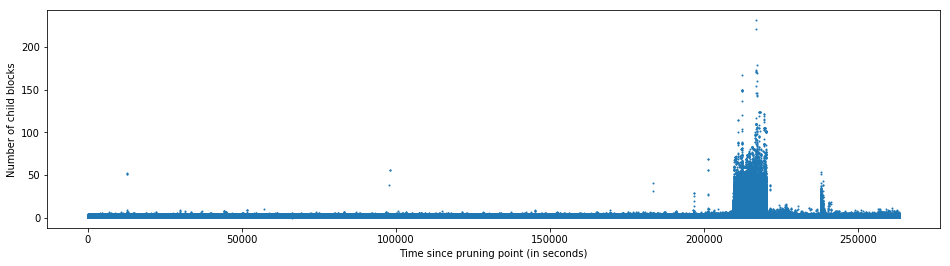

In [26]:
plt.figure(figsize=(16, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['num_children'], s=1)
plt.ylabel('Number of child blocks')
plt.xlabel('Time since pruning point (in seconds)')
plt.show()

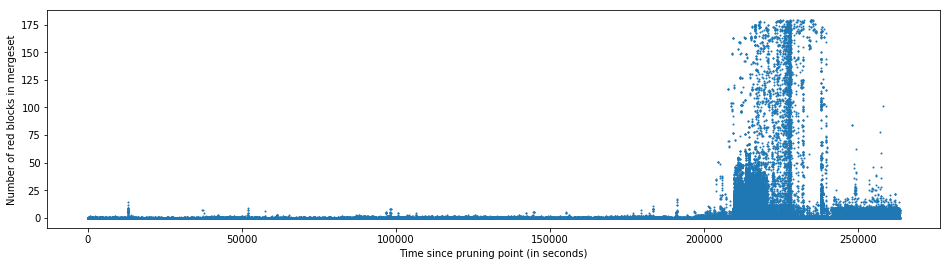

In [25]:
plt.figure(figsize=(16, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['num_reds'], s=1)
plt.ylabel('Number of red blocks in mergeset')
plt.xlabel('Time since pruning point (in seconds)')
plt.show()

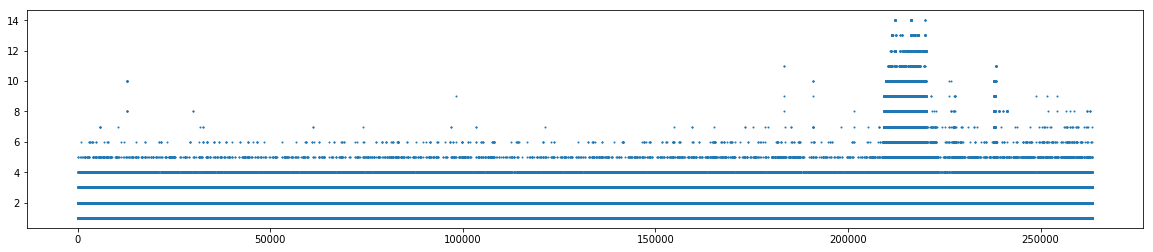

In [21]:
plt.figure(figsize=(20, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['num_blues'], s=1)
plt.show()

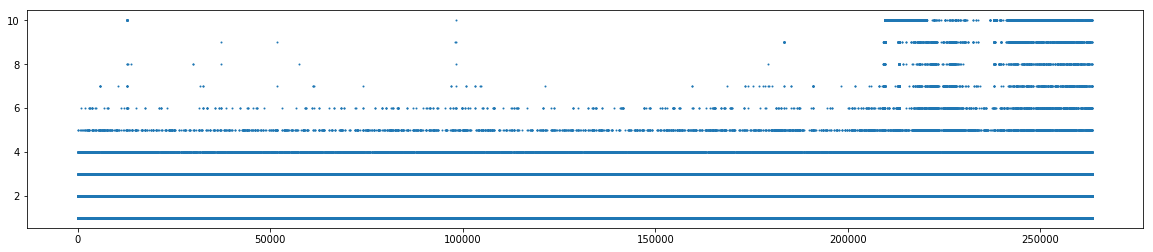

In [12]:
plt.figure(figsize=(20, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['num_parents'], s=1)
plt.show()

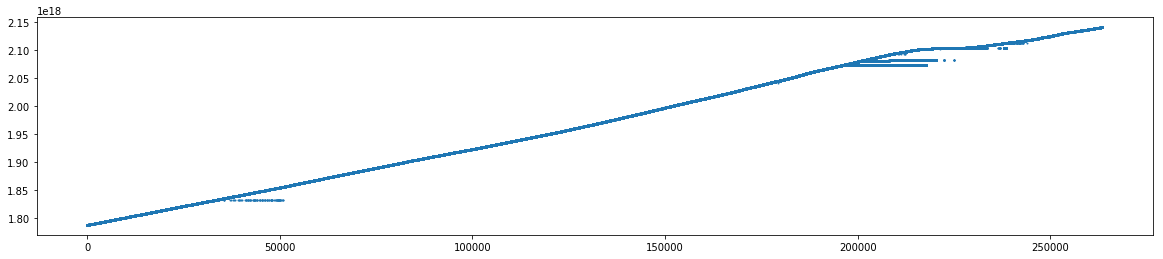

In [13]:
plt.figure(figsize=(20, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['blueWork'], s=1)
plt.show()

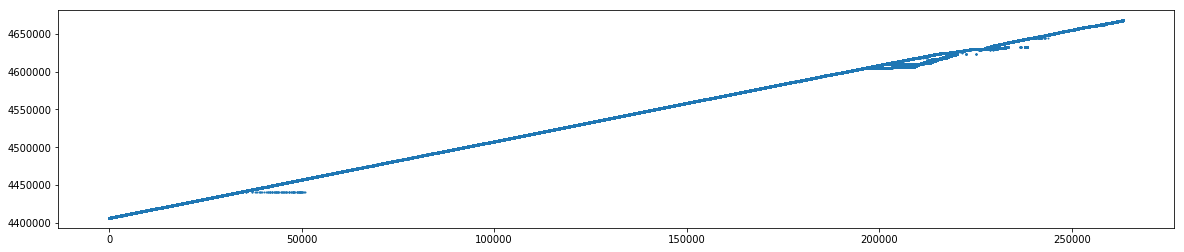

In [14]:
plt.figure(figsize=(20, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['blueScore'], s=1)
plt.show()

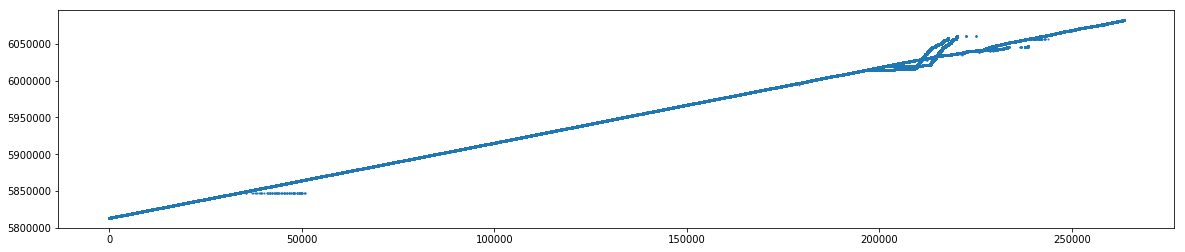

In [15]:
plt.figure(figsize=(20, 4))
plt.scatter((df['timeInMilliseconds'] - pp_time)/1000, df['daaScore'], s=1)
plt.show()

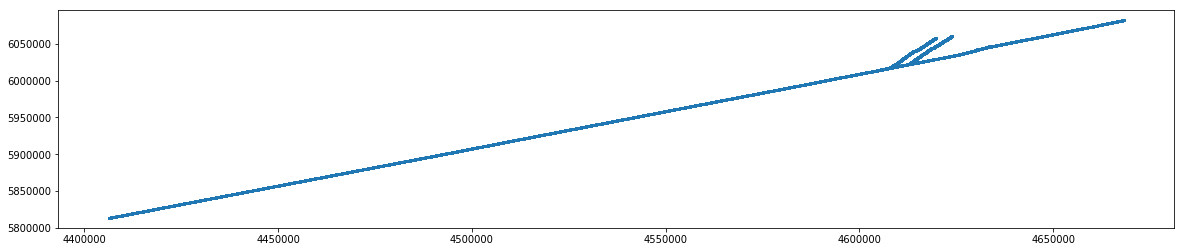

In [16]:
plt.figure(figsize=(20, 4))
plt.scatter(df['blueScore'], df['daaScore'], s=1)
plt.show()

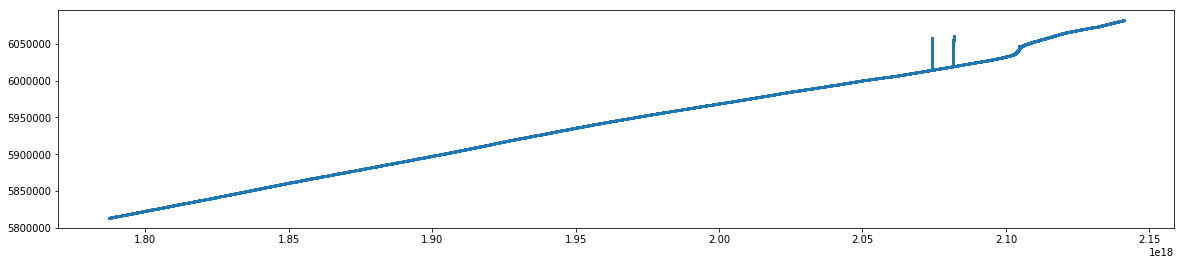

In [20]:
plt.figure(figsize=(20, 4))
plt.scatter(df['blueWork'], df['daaScore'], s=1)
plt.show()

In [17]:
df_groupedby_miner = df.groupby('pubkey_script')

In [18]:
len(df_groupedby_miner)

606

In [ ]:
# TODO: explore mining addresses of red blocks 

In [19]:
store.close()